# Lab1-Assignment

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

This notebook describes the assignment for Lab 1 of the text mining course. 

**Points**: each exercise is prefixed with the number of points you can obtain for the exercise.

We assume you have worked through the following notebooks:
* **Lab1.1-introduction**
* **Lab1.2-introduction-to-NLTK**
* **Lab1.3-introduction-to-spaCy** 

In this assignment, you will process an English text (**Lab1-apple-samsung-example.txt**) with both NLTK and spaCy and discuss the similarities and differences.

## Credits
The notebooks in this block have been originally created by [Marten Postma](https://martenpostma.github.io). Adaptations were made by [Filip Ilievski](http://ilievski.nl).

## Tip: how to read a file from disk
Let's open the file **Lab1-apple-samsung-example.txt** from disk.

In [1]:
from pathlib import Path

In [2]:
cur_dir = Path().resolve() # this should provide you with the folder in which this notebook is placed
path_to_file = Path.joinpath(cur_dir, 'Lab1-apple-samsung-example.txt')
print(path_to_file)
print('does path exist? ->', Path.exists(path_to_file))

/Users/joanapetkova/Documents/VU AI/Text Mining/TextMiningGroup8/Lab1/Lab1-apple-samsung-example.txt
does path exist? -> True


If the output from the code cell above states that **does path exist? -> False**, please check that the file **Lab1-apple-samsung-example.txt** is in the same directory as this notebook.

In [3]:
with open(path_to_file) as infile:
    text = infile.read()

print('number of characters', len(text))

number of characters 1139


## [total points: 4] Exercise 1: NLTK
In this exercise, we use NLTK to apply **Part-of-speech (POS) tagging**, **Named Entity Recognition (NER)**, and **Constituency parsing**. The following code snippet already performs sentence splitting and tokenization. 

In [4]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize

In [5]:
sentences_nltk = sent_tokenize(text)

In [6]:
tokens_per_sentence = []
for sentence_nltk in sentences_nltk:
    sent_tokens = word_tokenize(sentence_nltk)
    tokens_per_sentence.append(sent_tokens)

We will use lists to keep track of the output of the NLP tasks. We can hence inspect the output for each task using the index of the sentence.

In [7]:
sent_id = 1
print('SENTENCE', sentences_nltk[sent_id])
print('TOKENS', tokens_per_sentence[sent_id])

SENTENCE The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini.
TOKENS ['The', 'six', 'phones', 'and', 'tablets', 'affected', 'are', 'the', 'Galaxy', 'S', 'III', ',', 'running', 'the', 'new', 'Jelly', 'Bean', 'system', ',', 'the', 'Galaxy', 'Tab', '8.9', 'Wifi', 'tablet', ',', 'the', 'Galaxy', 'Tab', '2', '10.1', ',', 'Galaxy', 'Rugby', 'Pro', 'and', 'Galaxy', 'S', 'III', 'mini', '.']


### [point: 1] Exercise 1a: Part-of-speech (POS) tagging
Use `nltk.pos_tag` to perform part-of-speech tagging on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [8]:
pos_tags_per_sentence = []
for tokens in tokens_per_sentence:
    pos_tags = nltk.pos_tag(tokens)
    pos_tags_per_sentence.append(pos_tags)
    print(pos_tags)

[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]
[('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NNP'

In [9]:
print(pos_tags_per_sentence)

[[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')], [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NN

### [point: 1] Exercise 1b: Named Entity Recognition (NER)
Use `nltk.chunk.ne_chunk` to perform Named Entity Recognition (NER) on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [10]:
ner_tags_per_sentence = []

for tokens in tokens_per_sentence:
    ner_tags = nltk.ne_chunk(nltk.pos_tag(tokens))
    ner_tags_per_sentence.append(ner_tags)
    print(ner_tags)

(S
  https/NN
  :/:
  //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ
  Documents/NNS
  filed/VBN
  to/TO
  the/DT
  (ORGANIZATION San/NNP Jose/NNP)
  federal/JJ
  court/NN
  in/IN
  (GPE California/NNP)
  on/IN
  November/NNP
  23/CD
  list/NN
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  running/VBG
  the/DT
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  Ice/NNP
  Cream/NNP
  Sandwich/NNP
  ''/''
  operating/VBG
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  claims/VBZ
  infringe/VB
  its/PRP$
  patents/NNS
  ./.)
(S
  The/DT
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  affected/VBN
  are/VBP
  the/DT
  (ORGANIZATION Galaxy/NNP)
  S/NNP
  III/NNP
  ,/,
  running/VBG
  the/DT
  new/JJ
  (PERSON Jelly/NNP Bean/NNP)
  system/NN
  ,/,
  the/DT
  (ORGANIZATION Galaxy/NNP)
  Tab/NNP
  8.9/CD
  Wifi/NNP
  tablet/NN
  ,/,
  the/DT
  (ORGANIZATION Galaxy/NNP)
  Tab/NNP
  2/CD
  10.1/CD
  ,/,
  (PE

In [11]:
print(ner_tags_per_sentence)

[Tree('S', [('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), Tree('GPE', [('California', 'NNP')]), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('PERSON', [('Apple', 'NNP')]), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]), Tree('S', [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'),

### [points: 2] Exercise 1c: Constituency parsing
Use the `nltk.RegexpParser` to perform constituency parsing on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [12]:
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*''')

In [13]:
constituency_output_per_sentence = []

for pos_tags in pos_tags_per_sentence:
        constituency_tree = constituent_parser.parse(pos_tags)  
        constituency_output_per_sentence.append(constituency_tree)
        print(constituency_tree)  

(S
  (NP https/NN)
  :/:
  (NP
    //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ)
  Documents/NNS
  (VP (V filed/VBN))
  to/TO
  (NP the/DT)
  San/NNP
  Jose/NNP
  (NP federal/JJ court/NN)
  (P in/IN)
  California/NNP
  (P on/IN)
  November/NNP
  23/CD
  (NP list/NN)
  six/CD
  Samsung/NNP
  products/NNS
  (VP (V running/VBG) (NP the/DT))
  ``/``
  Jelly/RB
  Bean/NNP
  ''/''
  and/CC
  ``/``
  Ice/NNP
  Cream/NNP
  Sandwich/NNP
  ''/''
  (VP (V operating/VBG))
  systems/NNS
  ,/,
  which/WDT
  Apple/NNP
  (VP (V claims/VBZ))
  (VP (V infringe/VB))
  its/PRP$
  patents/NNS
  ./.)
(S
  (NP The/DT)
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  (VP (V affected/VBN))
  (VP (V are/VBP) (NP the/DT))
  Galaxy/NNP
  S/NNP
  III/NNP
  ,/,
  (VP (V running/VBG) (NP the/DT new/JJ))
  Jelly/NNP
  Bean/NNP
  (NP system/NN)
  ,/,
  (NP the/DT)
  Galaxy/NNP
  Tab/NNP
  8.9/CD
  Wifi/NNP
  (NP tablet/NN)
  ,/,
  (NP the/DT)
  Galaxy/NNP


In [14]:
print(constituency_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), ('San', 'NNP'), ('Jose', 'NNP'), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), ('California', 'NNP'), Tree('P', [('on', 'IN')]), ('November', 'NNP'), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), Tree('VP', [Tree('V', [('claims', 'VBZ')])]), Tree('VP', [Tree('V', [

Augment the RegexpParser so that it also detects Named Entity Phrases (NEP), e.g., that it detects *Galaxy S III* and *Ice Cream Sandwich*

In [15]:
constituent_parser_v2 = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>+} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*
NEP: {<RB>? <NNP>+ <CD>* <NNP|NN>*}    # Named Entity Phrase''') 
# NEP needs to be double-checked. In the case of Galaxy S III mini, it doesn't add "mini" to the whole NEP, but separates it as an NP.
# If I add NP to the rule at the end, some results such as "Galaxy range", "San Jose federal court", etc show up that do not sound right


# In the output, for some reason, we also get (NEP “/NNP). I'm not sure if this should be fixed - it seems to occur because of how 
# the POS tagging works. -Joana

In [16]:
constituency_v2_output_per_sentence = []

for pos_tags in pos_tags_per_sentence:
    constituency_tree_v2 = constituent_parser_v2.parse(pos_tags)
    constituency_v2_output_per_sentence.append(constituency_tree_v2)
    print(constituency_tree_v2)

(S
  (NP https/NN)
  :/:
  //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ
  Documents/NNS
  (VP (V filed/VBN))
  to/TO
  the/DT
  (NEP San/NNP Jose/NNP)
  (NP federal/JJ court/NN)
  (P in/IN)
  (NEP California/NNP)
  (P on/IN)
  (NEP November/NNP 23/CD)
  (NP list/NN)
  six/CD
  (NEP Samsung/NNP)
  products/NNS
  (VP (V running/VBG))
  the/DT
  ``/``
  (NEP Jelly/RB Bean/NNP)
  ''/''
  and/CC
  ``/``
  (NEP Ice/NNP Cream/NNP Sandwich/NNP)
  ''/''
  (VP (V operating/VBG))
  systems/NNS
  ,/,
  which/WDT
  (NEP Apple/NNP)
  (VP (V claims/VBZ))
  (VP (V infringe/VB))
  its/PRP$
  patents/NNS
  ./.)
(S
  The/DT
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  (VP (V affected/VBN))
  (VP (V are/VBP))
  the/DT
  (NEP Galaxy/NNP S/NNP III/NNP)
  ,/,
  (VP (V running/VBG))
  the/DT
  new/JJ
  (NEP Jelly/NNP Bean/NNP)
  (NP system/NN)
  ,/,
  the/DT
  (NEP Galaxy/NNP Tab/NNP 8.9/CD Wifi/NNP)
  (NP tablet/NN)
  ,/,
  the/DT
  (NEP Gala

In [17]:
print(constituency_v2_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), ('the', 'DT'), Tree('NEP', [('San', 'NNP'), ('Jose', 'NNP')]), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), Tree('NEP', [('California', 'NNP')]), Tree('P', [('on', 'IN')]), Tree('NEP', [('November', 'NNP'), ('23', 'CD')]), Tree('NP', [('list', 'NN')]), ('six', 'CD'), Tree('NEP', [('Samsung', 'NNP')]), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')])]), ('the', 'DT'), ('``', '``'), Tree('NEP', [('Jelly', 'RB'), ('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), Tree('NEP', [('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP')]), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('NEP', [('Apple', 'NNP')]), Tree('

## [total points: 1] Exercise 2: spaCy
Use Spacy to process the same text as you analyzed with NLTK.

In [18]:
# import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m spacy download en_core_web_sm
### added by mahbod to fix import issues

import spacy
nlp = spacy.load('en_core_web_sm')

In [19]:
doc = nlp(text) # insert code here
sentences_spacy = list(doc.sents)

#PoS tagging with spaCy
tokens_tags = []
for sents in sentences_spacy:
    tokens_tags_per_sent = []
    for token in sents:
        token_tag = (token.text, token.tag_)
        tokens_tags_per_sent.append(token_tag)
    tokens_tags.append(tokens_tags_per_sent)
    print(tokens_tags_per_sent)

[('https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'NNP'), ('\n\n', '_SP'), ('Documents', 'NNPS'), ('filed', 'VBD'), ('to', 'IN'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('"', '``'), ('Jelly', 'NNP'), ('Bean', 'NNP'), ('"', "''"), ('and', 'CC'), ('"', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ('"', "''"), ('operating', 'NN'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VBP'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.'), ('\n', '_SP')]
[('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III

In [20]:
#NER (Named Entity Recognition) with spaCy
entities = []
for sents in sentences_spacy:
    for ent in sents.ents:
        entity = (ent.text, ent.label_)
        entities.append(entity)
        print(entity)

('San Jose', 'GPE')
('California', 'GPE')
('November 23', 'DATE')
('six', 'CARDINAL')
('Samsung', 'ORG')
('Jelly Bean', 'WORK_OF_ART')
('Apple', 'ORG')
('six', 'CARDINAL')
('the Galaxy S III', 'PERSON')
('Jelly Bean', 'ORG')
('Galaxy Tab 8.9 Wifi', 'PERSON')
('Galaxy Tab 2 10.1', 'PERSON')
('Apple', 'ORG')
('Apple', 'ORG')
('August', 'DATE')
('Samsung', 'ORG')
('US', 'GPE')
('Apple', 'ORG')
('1.05bn', 'MONEY')
('0.66bn', 'MONEY')
('iPad', 'ORG')
('iPhone', 'ORG')
('Samsung', 'ORG')
('UK', 'GPE')
('Samsung', 'ORG')
('Apple', 'ORG')
('South Korean', 'NORP')
('iPad', 'ORG')


In [21]:
# Dependency Parsing with spaCy
from spacy import displacy
for sent in sentences_spacy:
    displacy.render(sent, jupyter=True, style='dep')

small tip: You can use **sents = list(doc.sents)** to be able to use the index to access a sentence like **sents[2]** for the third sentence.


## [total points: 7] Exercise 3: Comparison NLTK and spaCy
We will now compare the output of NLTK and spaCy, i.e., in what do they differ?

### [points: 3] Exercise 3a: Part of speech tagging
Compare the output from NLTK and spaCy regarding part of speech tagging.

* To compare, you probably would like to compare sentence per sentence. Describe if the sentence splitting is different for NLTK than for spaCy. If not, where do they differ?


Both *NLTK* and *spaCy* produce nearly identical sentence splittings for the given text, correctly dividing it into sentences, with almost no differences in how they identify where one sentence ends and another begins. The only difference we noticed is between the third and fourth sentences. While *NLTK* correctly considers the quotations marks at the end of third sentence to be part of third sentence, *spaCy* identifies them as the beginning of fourth sentence.
More noticeable differences between the approaches of the two libraries can be observed at the tokenization level, where sentences are split into different subparts. One noticable example of such a difference is the way URLs are handled, with *NLTK* splitting them into multiple tokens, while *spaCy* preserves them in a single token, or line breaks handling (*NLTK* skips them, while *spaCy* tokenizes them with `_SP`). Nonetheless, for overall sentence segmentation, they perform consistently with each other.

* After checking the sentence splitting, select a sentence for which you expect interesting results and perhaps differences. Motivate your choice.

We chose to compare the outputs of both *NLTK* and *spaCy* on sentence 4 (at index 3). The main reason is that this sentence contains a variety of parts of speech  (e.g, singular proper nouns, possesive pronouns, gerund verbs, past tense verbs, past participle verbs) that make it an interesting case for comparison. We also wanted to observe how the two approaches differ in handling the presence of numeric values associated with currencies (e.g., £0.66bn).

In [22]:
print(sentences_nltk[3])
print("\nNLTK:")
print(pos_tags_per_sentence[3])
print("\nspaCy:")
print(tokens_tags[3])


In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices.

NLTK:
[('In', 'IN'), ('August', 'NNP'), (',', ','), ('Samsung', 'NNP'), ('lost', 'VBD'), ('a', 'DT'), ('US', 'NNP'), ('patent', 'NN'), ('case', 'NN'), ('to', 'TO'), ('Apple', 'NNP'), ('and', 'CC'), ('was', 'VBD'), ('ordered', 'VBN'), ('to', 'TO'), ('pay', 'VB'), ('its', 'PRP$'), ('rival', 'JJ'), ('$', '$'), ('1.05bn', 'CD'), ('(', '('), ('£0.66bn', 'NN'), (')', ')'), ('in', 'IN'), ('damages', 'NNS'), ('for', 'IN'), ('copying', 'VBG'), ('features', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('iPad', 'NN'), ('and', 'CC'), ('iPhone', 'NN'), ('in', 'IN'), ('its', 'PRP$'), ('Galaxy', 'NNP'), ('range', 'NN'), ('of', 'IN'), ('devices', 'NNS'), ('.', '.')]

spaCy:
[('"', "''"), ('\n', '_SP'), ('In', 'IN'), ('August', 'NNP'), (',', ','), ('Samsung', 'NNP'), ('lost', 'VBD'), ('a', 'DT'), ('US', 'NNP'), ('patent', 'N

* Compare the output in `token.tag` from spaCy to the part of speech tagging from NLTK for each token in your selected sentence. Are there any differences? This is not a trick question; it is possible that there are no differences.

Upon comparing the tokens and their assigned tags by both NLTK and spaCy in the sentence, we found that most tags were consistent, showing good agreement on parts of speech. However, a few key differences were observed:
* *spaCy* uses special token  `_SP` for line breaks, whereas *NLTK* skips or ignores spaces during tokenization.
* The first "to" preposition, *NLTK* correctly tagged as `TO` (seperate tag reserved for the word "to"), while *spaCy* tagged as `IN` (general tag for prepositions).
* Parentheses in *NLTK* are tagged with simple punctuation labels, while *spaCy* uses `-LRB-` (left round bracket) and `-RRB-` (right round bracket).
* Currency "£0.66bn" *NLTK* tagged as a noun (`NN`), whereas *spaCy* tags the currency symbol £ as `$` (currency), and the number 0.66bn as `CD` (cardinal number). This misalignment does not occur when the currency is $, in which case both *NLTK* adn *spaCy* tag it correctly as a currency and a cardinal number.
* "iPad" and "iPhone" are incorrectly tagged by *NLTK* as `NN` (common noun), while *spaCy* correctly tags them as proper nouns `NNP` since they are product names.

### [points: 2] Exercise 3b: Named Entity Recognition (NER)
* Describe differences between the output from NLTK and spaCy for Named Entity Recognition. Which one do you think performs better?

In [23]:
#NER with nltk
print("NLTK:\n")
ner_tags_per_sentence = []

for tokens in tokens_per_sentence:
    ner_tree = nltk.ne_chunk(nltk.pos_tag(tokens)) 
    ner_tags_per_sentence.append(ner_tree)

    for subtree in ner_tree:
        if hasattr(subtree, 'label'):
            entity_name = ""
            for token, pos in subtree.leaves():
                entity_name += f"{token} " 
             
            entity_type = subtree.label()
            print(f"{entity_name.strip()}: {entity_type}")

NLTK:

San Jose: ORGANIZATION
California: GPE
Samsung: ORGANIZATION
Bean: GPE
Apple: PERSON
Galaxy: ORGANIZATION
Jelly Bean: PERSON
Galaxy: ORGANIZATION
Galaxy: ORGANIZATION
Galaxy Rugby Pro: PERSON
Galaxy S: PERSON
Apple: PERSON
Apple: PERSON
August: GPE
Samsung: PERSON
US: GSP
Apple: GPE
iPad: ORGANIZATION
iPhone: ORGANIZATION
Galaxy: GPE
Samsung: GPE
UK: ORGANIZATION
Samsung: GPE
Apple: PERSON
South Korean: LOCATION


In [24]:
#NER with spaCy
print("spaCy:\n")
entities = []
for sents in sentences_spacy:
    for ent in sents.ents:
        entity = (ent.text, ent.label_)
        entities.append(entity)
        print(f"{entity[0]}: {entity[1]}")

spaCy:

San Jose: GPE
California: GPE
November 23: DATE
six: CARDINAL
Samsung: ORG
Jelly Bean: WORK_OF_ART
Apple: ORG
six: CARDINAL
the Galaxy S III: PERSON
Jelly Bean: ORG
Galaxy Tab 8.9 Wifi: PERSON
Galaxy Tab 2 10.1: PERSON
Apple: ORG
Apple: ORG
August: DATE
Samsung: ORG
US: GPE
Apple: ORG
1.05bn: MONEY
0.66bn: MONEY
iPad: ORG
iPhone: ORG
Samsung: ORG
UK: GPE
Samsung: ORG
Apple: ORG
South Korean: NORP
iPad: ORG


*NLTK and spaCy* exhibit the many differences in how they process text and identify entities. The primary differences that we noticed are the following:
- *NLTK* fails to recognize the two dates present in the text, while *spaCY* correctly labels both of them. More precisely, *NLTK* does not identify "November 23" as an entity at all and misclassifies "August" as a GPE (geopolitical entity), while *spaCy* identifies both as DATE entities. 
 - *NLTK* fails to identify the financial values ($1.05bn and £0.66bn) present in the text as entities, while *spaCy* labels both of them correctly as MONEY entities.
 - *NLTK* misclassifies the companies Apple and Samsung, often labeling them inconsistently as PERSON, ORGANIZATION, or GPE, while *spaCy* shows more consistency in classifying these entities, correctly identifying Apple and Samsung as ORG (organization) entities.
 - *NLTK* misclassifies "UK" as an ORGANIZATION entity, while *spaCy* correctly identifies it as a GPE (geopolitical entity).
 - *spaCy* has a seperate category NORP (Nationalities or Religious/Political groups) for entities that express belonging to a certain country like "South Korean", while *NLTK* only has the general label LOCATION that it uses to refer to such entities. 
- Both *NLTK* and *spaCy* missclassify products, such as the Galaxy Rugby Pro, iPad and iPhone, as PERSON or ORG/ORGANIZATION. However, *spaCy* is able to identify the full names of most of the products, while *NLTK* has problems doing so (e.g. "Galaxy Tab 2 10.1" vs. "Galaxy") without a manually defined grammar for named entity phrases (see exercise 1c) .
- *spaCy* identifies the number "six" in the text as a CARDINAL (cardinal number) entity, which *NLTK* does not recognize it as an entity at all.

Overall, we believe that *spaCy* is better than *NLTK* due to its greater accuracy, consistency, and a more detailed entity list (e.g., `WORK_OF_ART`, `NORP`). However, both approaches seem to have their weaknesses and might exhibit variable performance depending on the  text type.

### [points: 2] Exercise 3c: Constituency/dependency parsing
Choose one sentence from the text and run constituency parsing using NLTK and dependency parsing using spaCy.
* describe briefly the difference between constituency parsing and dependency parsing
* describe differences between the output from NLTK and spaCy.

**We use the sentence below as an example:**

> *“Samsung, which is the world's top mobile phone maker, is appealing the ruling.”*

---

### Difference between constituency parsing and dependency parsing

- **Constituency parsing** divides a sentence into nested phrases (NP for noun phrase, VP for verb phrase). It shows hierarchical groupings such as `(NP top/JJ mobile/NN phone/NN maker/NN)` to illustrate how words build up to larger units (subjects, objects, and etc).

- **Dependency parsing** focuses on direct word-to-word relations via arrows or links. Each word is a “node,” and edges label grammatical functions: for instance, “Samsung” might be the subject (`nsubj`), “appealing” the verb (`ROOT`), and “the ruling” the object (`dobj`). It does not explicitly chunk words into NPs or VPs, but it shows direct “who modifies whom” relationships.

---

### Differences in the output from NLTK and spaCy

- **NLTK (Constituency)**: In the RegexpParser output, the sentence might appear bracketed like:

  ```text
  (S
    (NP Samsung/NNP)
    ,/,
    which/WDT
    (VP (V is/VBZ) (NP the/DT world/NN))
    's/POS
    (NP top/JJ mobile/NN phone/NN maker/NN)
    ,/,
    (VP (V is/VBZ))
    (VP (V appealing/VBG) (NP the/DT ruling/NN))
    ./.)
    ```
  This hierarchical nested structure, where the sentence (S) represents the root, emphasizes how words combine into labeled phrases, such as noun phrases `(NP ...)` and verb phrases `(VP ...)`.

- **spaCy (Dependency):** The `displacy.render` visualization creates a graph with arrows from each “head” word to its “dependent” words, representing their grammatical dependency. You would see labels like `nsubj` from “Samsung” to the verb “appealing,” or `det` from “the” to “ruling.” Instead of large bracketed phrases, spaCy shows direct grammatical functions (subjects, objects, modifiers) among individual words. A key difference from the NLTK constituency tree is that spaCy identifies a single root word for each sentence. In this case, the root is the main verb "appealing", with all other words being directly or indirectly dependent on it.

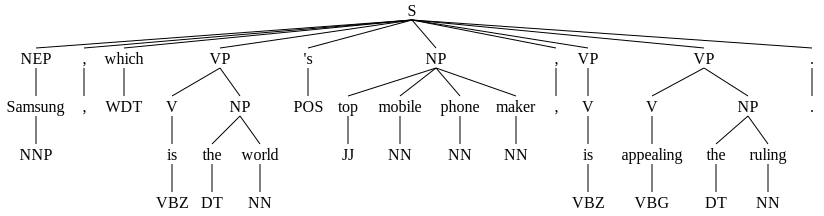

In [25]:
# Constituency parsing with NLTK
# !pip install svgling
constituency_v2_output_per_sentence[4]

In [26]:
# Dependency Parsing with spaCy
displacy.render(sentences_spacy[4], jupyter=True, style='dep')

# End of this notebook